In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/study-multiple/Student_Performance.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
x=6*np.random.rand(100,1)-3
y=0.5*x**2 + 1.5*x +2+np.random.rand(100,1)

# > **BELOW NORMAL REGRESSION FOLLWED BY    POLYNOMIAL REGRESSION**

In [4]:
# TRAIN_TEST_SPLIT
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [5]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

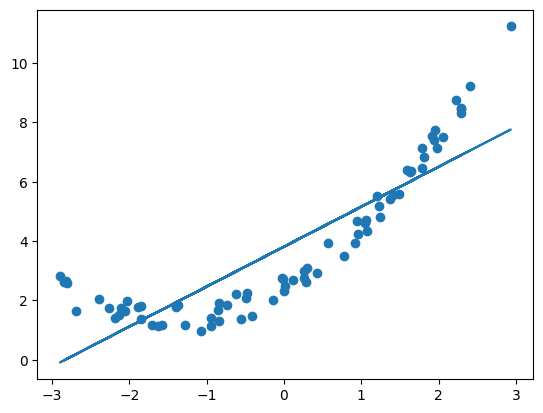

In [6]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))


# lets find R^2

In [7]:
y_pred=regression.predict(x_test)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7643727969857569


# we can see that how worse it is.... !!!
# so use polynomial regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [9]:
x_test_poly

array([[ 1.        ,  1.13679227,  1.29229666],
       [ 1.        , -1.6298676 ,  2.6564684 ],
       [ 1.        ,  2.0615647 ,  4.25004901],
       [ 1.        ,  2.98109174,  8.88690798],
       [ 1.        ,  0.42651731,  0.18191702],
       [ 1.        ,  2.00100377,  4.00401608],
       [ 1.        , -1.80124214,  3.24447326],
       [ 1.        ,  2.9549428 ,  8.73168694],
       [ 1.        , -2.05601063,  4.22717971],
       [ 1.        , -1.32067058,  1.74417077],
       [ 1.        , -1.52544976,  2.32699697],
       [ 1.        , -1.36435368,  1.86146098],
       [ 1.        ,  2.97180886,  8.83164792],
       [ 1.        , -2.72020164,  7.39949694],
       [ 1.        ,  1.50505498,  2.2651905 ],
       [ 1.        ,  1.252391  ,  1.56848322],
       [ 1.        ,  2.57416111,  6.62630544],
       [ 1.        , -1.03886587,  1.0792423 ],
       [ 1.        , -1.63978433,  2.68889264],
       [ 1.        , -1.43447189,  2.05770959],
       [ 1.        , -2.884712  ,  8.321

In [10]:
regression.fit(x_train_poly,y_train)

LinearRegression()

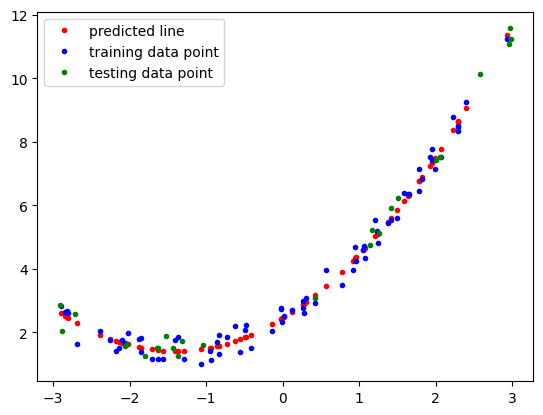

In [11]:
plt.plot(x_train,regression.predict(x_train_poly),"r.",label="predicted line")
plt.plot(x_train,y_train,"b.",label="training data point")
plt.plot(x_test,y_test,"g.",label="testing data point")
plt.legend()
plt.show()

**note: above randomly generated ponts need not to be in a ascending order ( to plot a line )**

# now R^2 for polyomial regression

In [12]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression.predict(x_test_poly))
print(score)

0.9944614609227433


# note :it is clearly,for polynomial regression R^2 is grater than linear regression R^2